# Visualization of tensors

In [11]:
from sympy import Matrix
from continuum_mechanics.visualization import mohr2d, mohr3d, traction_circle

In [12]:
%matplotlib notebook

## Visualization in 2D

First, let us visualize the tensor

$$\begin{bmatrix}
1 &0\\
0 &-1
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


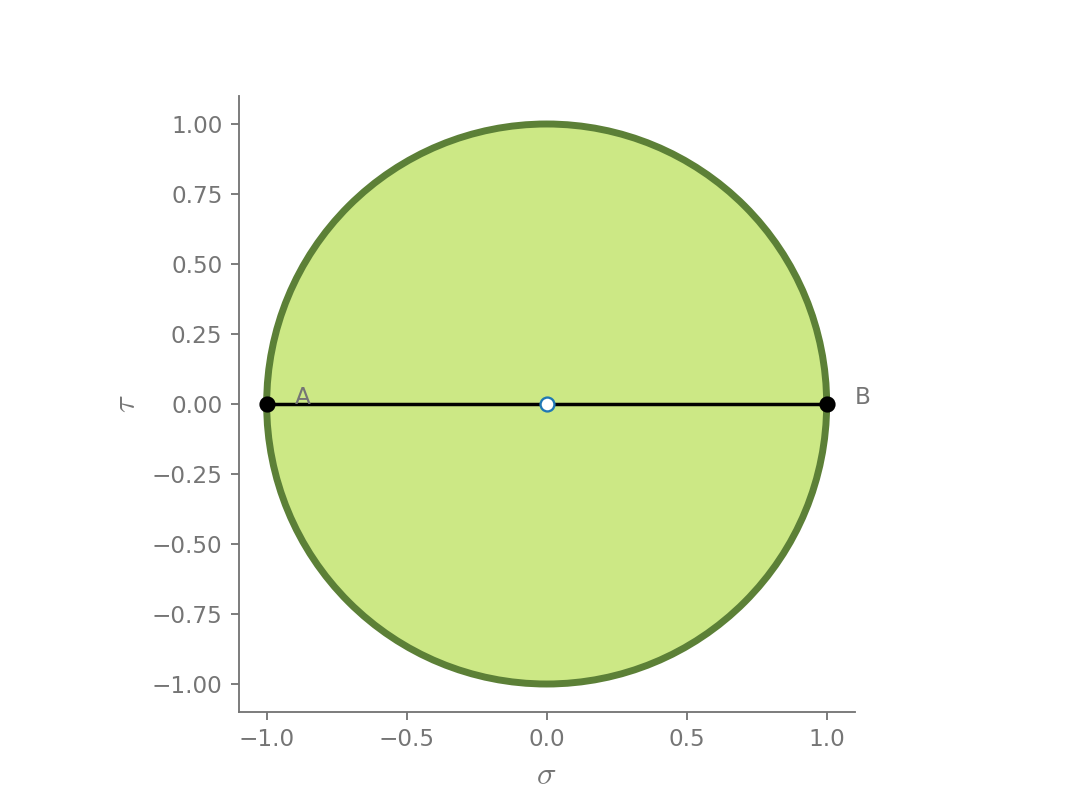

In [13]:
mohr2d(Matrix([
    [1,0],
    [0,-1]]))

From the Mohr circle, we can see that the principal directions are given
at :math:`0` and :math:`\pi/2` radians. This can be more easily
visualized using the traction circle, where normal vectors are presented
in light gray and the traction vectors are presented in colors.

<IPython.core.display.Javascript object>


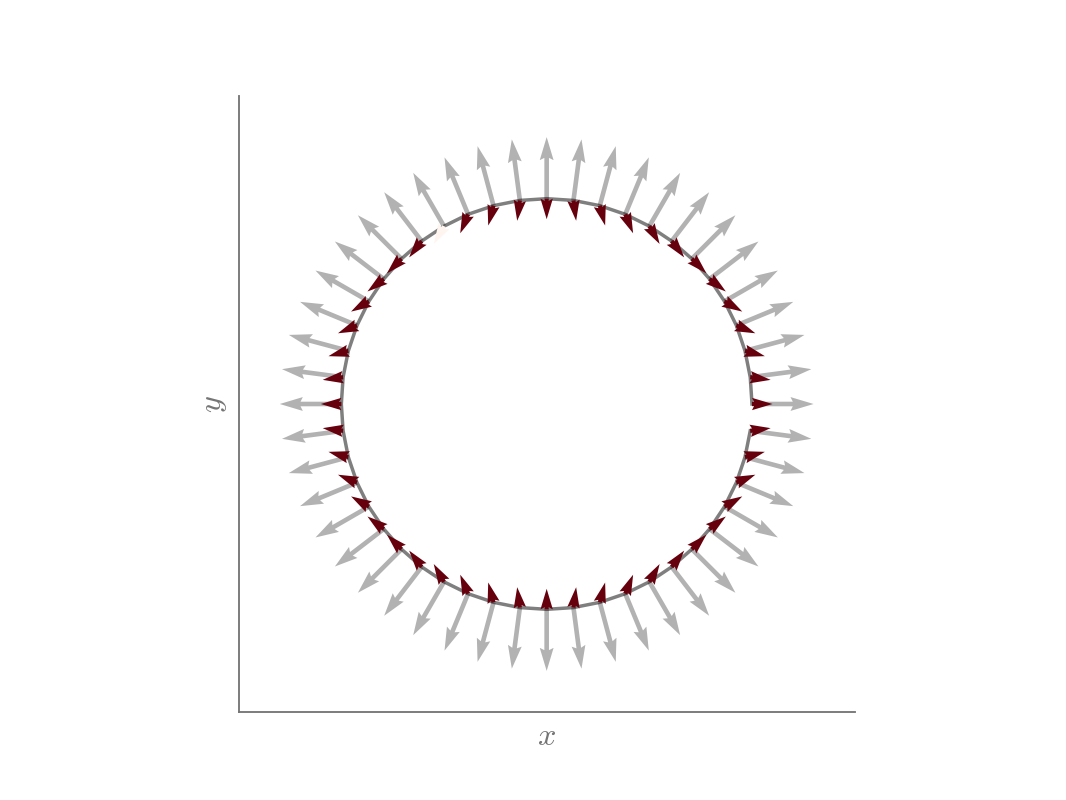

In [14]:
traction_circle(Matrix([
    [1,0],
    [0,-1]]))

Now, let us visualize

$$\begin{bmatrix}
1 &3\\
3 &-5
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


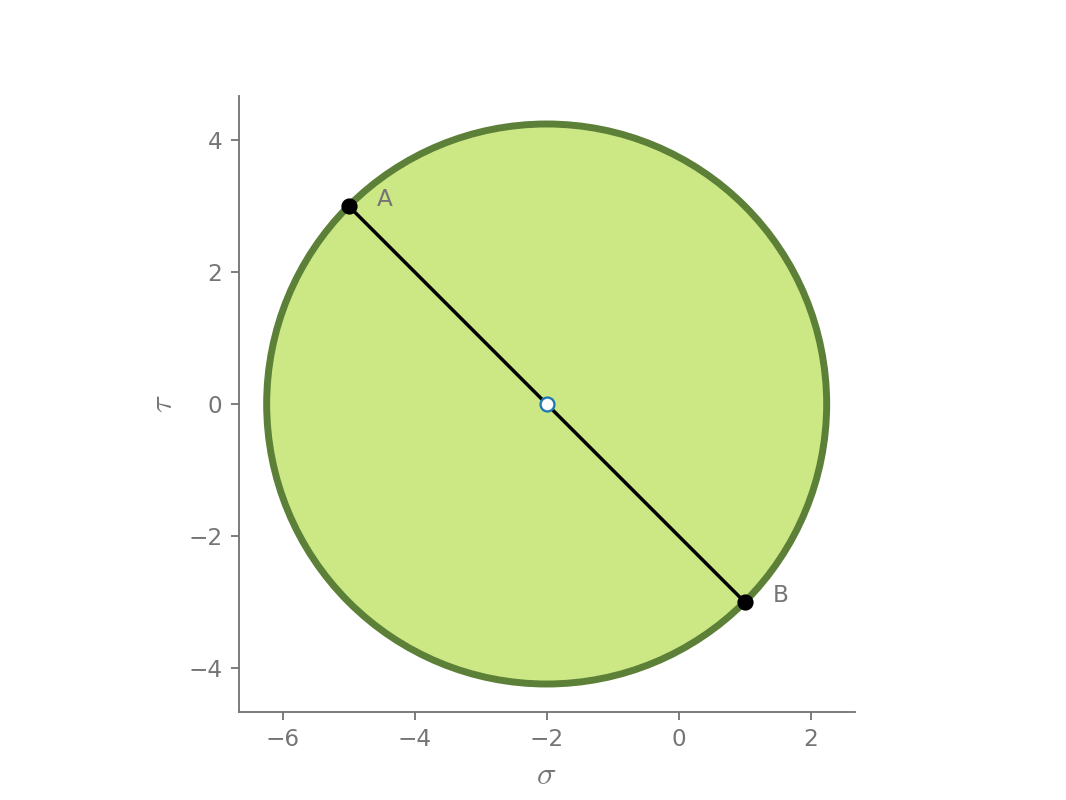

In [15]:
mohr2d(Matrix([
    [1, 3],
    [3, -5]]))

<IPython.core.display.Javascript object>


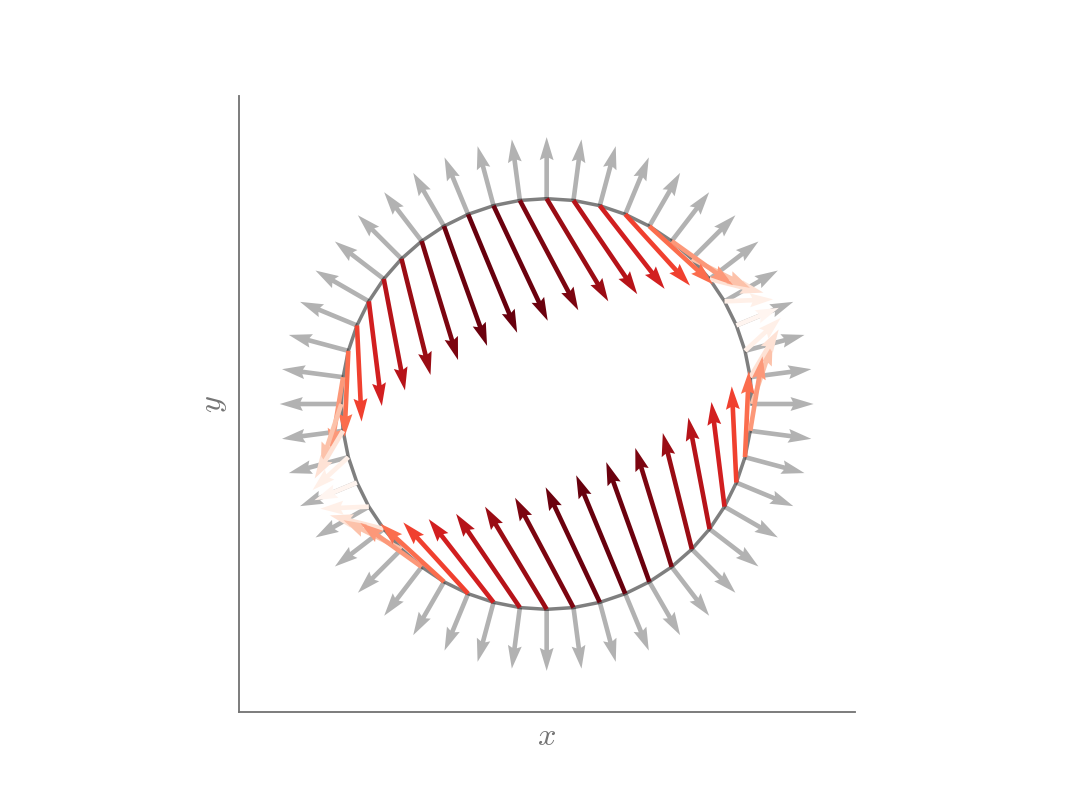

In [16]:
traction_circle(Matrix([
    [1, 3],
    [3, -5]]))

Now, let us try it with an asymmetric tensor

$$\begin{bmatrix}
1 &2\\
0 &3
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


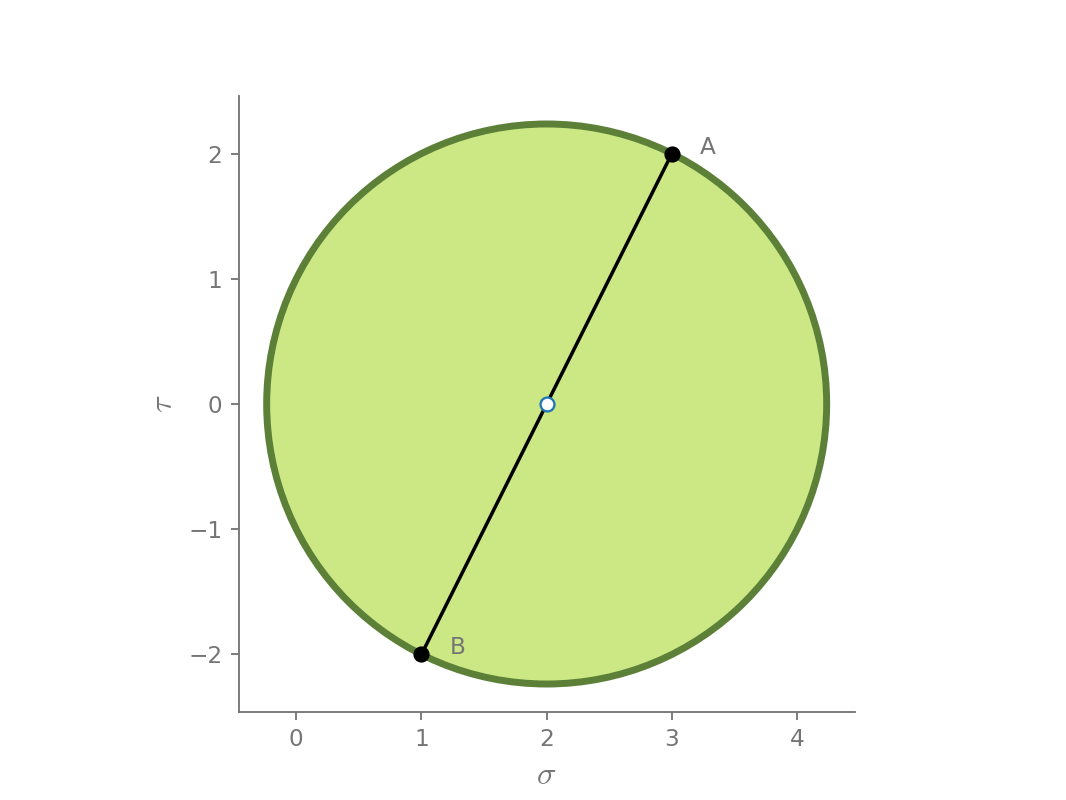

In [21]:
mohr2d(Matrix([
    [1, 2],
    [0, 3]]))

<IPython.core.display.Javascript object>


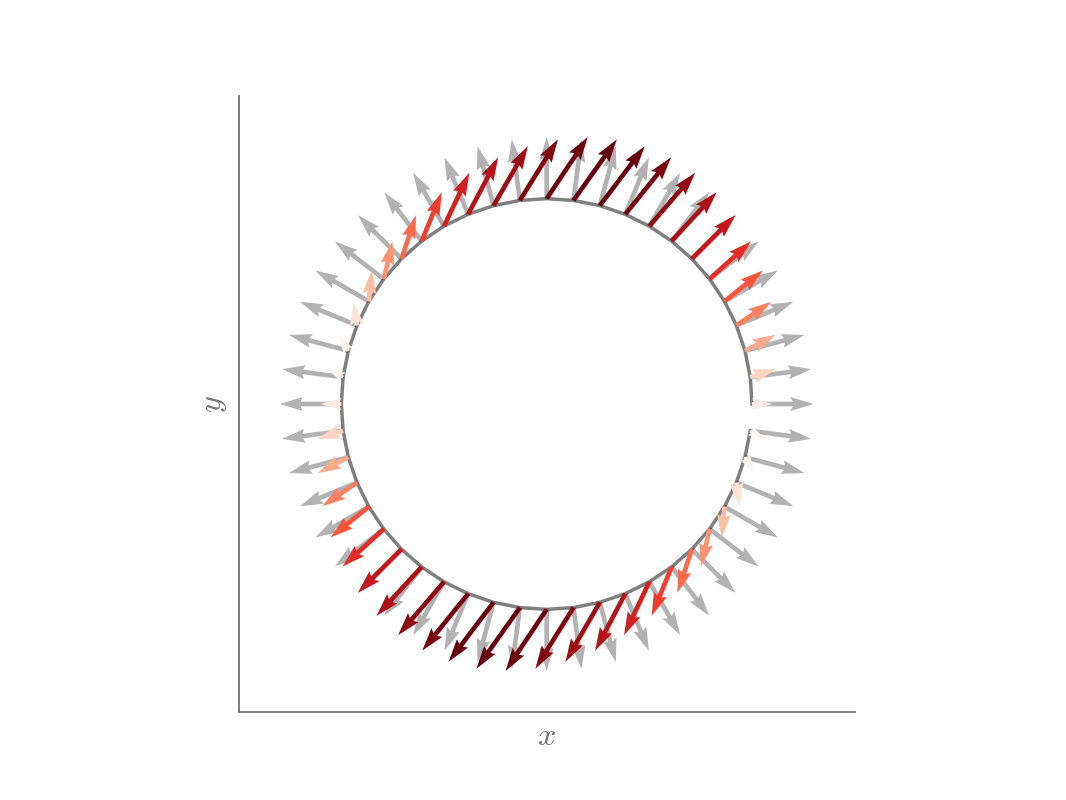

In [18]:
traction_circle(Matrix([
    [1, 2],
    [0, 3]]))

## Mohr Circle in 3D



Let us visualize the tensor

$$\begin{bmatrix}
1 &2 &4\\
2 &2 &1\\
4 &1 &3
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


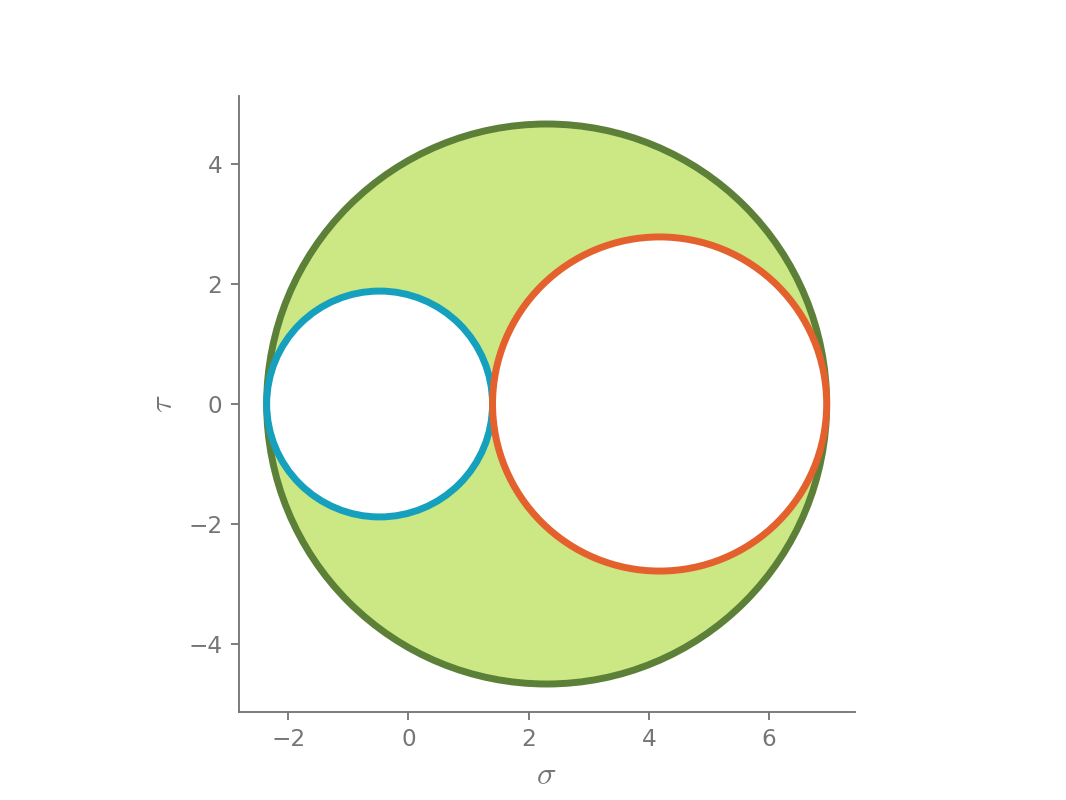

In [19]:
mohr3d(Matrix([
    [1, 2, 4],
    [2, 2, 1],
    [4, 1, 3]]))

Now, let us visualize the tensor

$$\begin{bmatrix}
1 &0 &0\\
0 &2 &0\\
0 &0 &3
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


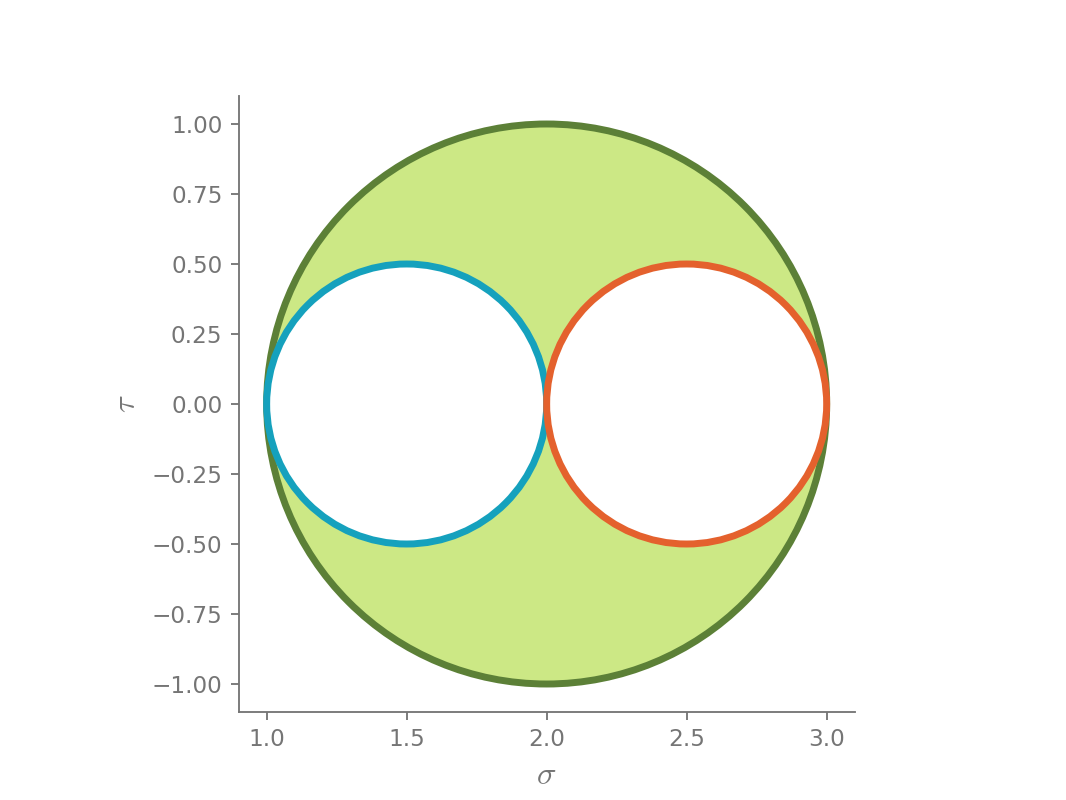

In [20]:
mohr3d(Matrix([
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3]]))